# Clustering

In [5]:
from sklearn.cluster import KMeans

## KMean SetUp&Test

Kmeans algorithm provides better initial seeding in order to find the best clusters.

ref: https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

In [8]:
# create kmeans object
kmeans = KMeans(n_clusters=4)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]]


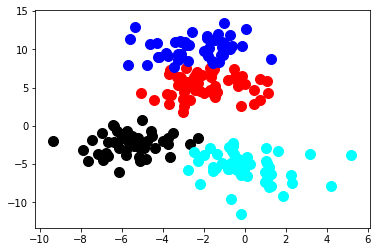

In [7]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

## KMean


K-mean is one of the unsupervised algorithms, meaning that uses only input vectors, without knowlodge of the outcomes. AndreyBu [https://www.education-ecosystem.com/andreybu/REaxr-machine-learning-model-python-sklearn-kera/oPGdP-machine-learning-model-python-sklearn-kera/] puts as 

“the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

K would then mean the number of possible centres of clusters.

### How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    The centroids have stabilized — there is no change in their values because the clustering has been successful.
    The defined number of iterations has been achieved.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


Transforming data in categorical


In [12]:
df_original = pd.read_csv('data/treated_data/TerrestrialReport_lc_ld_mammals.txt',sep="|", dtype='unicode')
df = pd.read_csv('data/treated_data/TerrestrialReport_lc_ld_mammals.txt',sep="|", dtype='unicode')

# cat_columns = df.select_dtypes(['category']).columns
# df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

The value of k reflects the 10 important Endpoints in the dataset

In [13]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=10)
Kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
Kmean.cluster_centers_

array([[ 1.85443038e+02,  2.36873418e+02,  3.30379747e+00,
        -9.24050633e-01,  8.99746835e+01, -1.00000000e+00,
         5.98734177e+00, -1.00000000e+00,  5.98734177e+00,
         1.89873418e-01,  2.91265823e+01,  2.03544304e+01,
         5.58227848e+00, -9.24050633e-01,  2.64050633e+01,
        -1.00000000e+00,  2.31518987e+01, -1.00000000e+00,
         2.74936709e+01,  3.92405063e+00,  1.84810127e+00,
         1.98734177e+00,  9.37974684e+00,  1.95696203e+01,
         7.73417722e+00,  2.00000000e+00,  2.00000000e+00,
         1.83544304e+00,  2.49367089e+00,  7.59493671e-01,
        -9.36708861e-01,  2.06455696e+02, -1.00000000e+00,
         6.20443038e+02, -1.00000000e+00,  1.69772152e+02,
         2.03797468e+01, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+0

In [18]:
plt.scatter(df[ : , 0], df[ : , 1], s =50, c=’b’)
plt.scatter(-0.94665068, -0.97138368, s=200, c=’g’, marker=’s’)
plt.scatter(2.01559419, 2.02597093, s=200, c=’r’, marker=’s’)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-18-08d0d6338da0>, line 1)

In [ ]:
Kmean.labels_